In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys

In [2]:
data_dir=r"c:\Users\emeraldgeomodelling\Software\ga-aem-emrld\examples\bhmar-skytem\data"
data_file=r"bhmar-skytem.dat"
data_fullfile=os.path.join(data_dir, data_file)

In [3]:
%load_ext autoreload
%autoreload 2

sys.path.append( r"c:\Users\emeraldgeomodelling\Software\ga-aem-emrld\python" )
from gaaem_utils import *

In [4]:
data=read_GAAEM_data(data_fullfile)

In [5]:
for c in data["flightlines"].columns:
    print("{0} : {1}".format(c, data["flightlines"].loc[0,c] ))

project_ga : 1216
project_geoforce : 1137
system : 2
date : 20090803
flight : 20090803.22
line : 24000
fid : 1261433.0
datetime : 50515.26
utc_datetime : 40028.1680007523
utc_date : 20090803.0
utc_time : 40155.26
easting : 603036.5
northing : 6413475.5
latitude : -32.411027
longitude : 142.095736
gps_height : 96.3
groundspeed : 75.4
frame_height_laser : 30.3
frame_height_lidar : 27.7
ground_elevation_laser : 66.0
ground_elevation_lidar : 68.63
angleX : 11.86
angleY : -0.17
frame_roll : -0.17
frame_pitch : -11.86
frame_yaw : 0.0
txrx_dx : -12.79
txrx_dy : 0.01
txrx_dz : -0.48
LM_current : 39.04
HM_current : 96.24
powerline_monitor : 8.6589


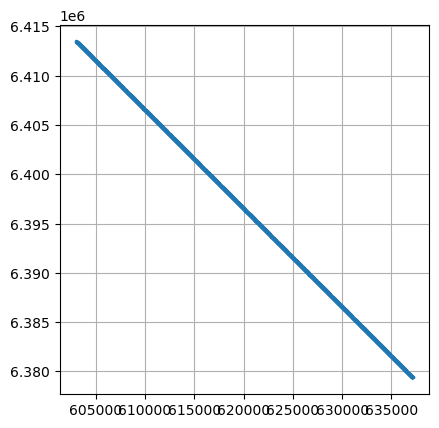

In [6]:
fig, ax = plt.subplots()
ax.plot(data["flightlines"].easting, data["flightlines"].northing, ".-", ms=3)
ax.set_aspect("equal")
ax.grid()

In [7]:
data["layer_data"]

{'LMZ':              LMZ_0         LMZ_1         LMZ_2         LMZ_3         LMZ_4  \
 0     7.523380e-09  5.270510e-09  3.795530e-09  2.821720e-09  2.148280e-09   
 1     7.139440e-09  5.002120e-09  3.612540e-09  2.690160e-09  2.051400e-09   
 2     6.732400e-09  4.718050e-09  3.418920e-09  2.551260e-09  1.949120e-09   
 3     6.339060e-09  4.445690e-09  3.232690e-09  2.418520e-09  1.851360e-09   
 4     5.964160e-09  4.189900e-09  3.056390e-09  2.294160e-09  1.759770e-09   
 ...            ...           ...           ...           ...           ...   
 5037  1.100260e-08  7.480570e-09  5.088550e-09  3.556130e-09  2.593520e-09   
 5038  1.030110e-08  7.033770e-09  4.800060e-09  3.356070e-09  2.447890e-09   
 5039  9.633440e-09  6.608110e-09  4.522910e-09  3.164440e-09  2.308320e-09   
 5040  9.013090e-09  6.209060e-09  4.258870e-09  2.982270e-09  2.175360e-09   
 5041  8.479080e-09  5.862250e-09  4.026020e-09  2.821810e-09  2.058030e-09   
 
              LMZ_5         LMZ_6         L

In [8]:
calc_lineOffset(data)

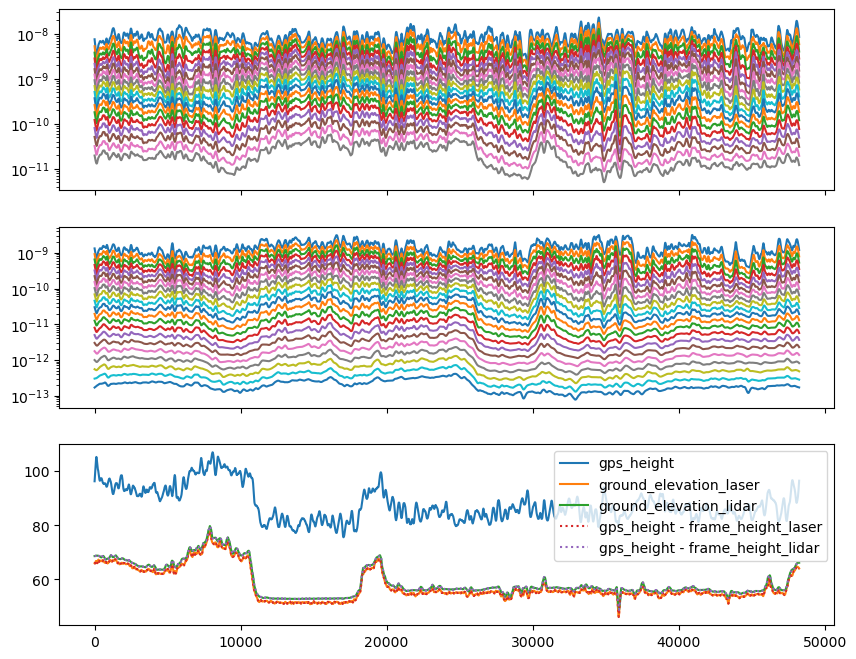

In [9]:
fig, ax = plt.subplots(3,1,figsize=(10,8), sharex=True)
ax[0].plot(data["flightlines"].lineoffset, 
          data["layer_data"]["LMZ"],
          label="LMZ")
ax[0].set_yscale("log")
ax[1].plot(data["flightlines"].lineoffset, 
          data["layer_data"]["HMZ"],
          label="HMZ")
ax[1].set_yscale("log")

for c in ["gps_height", "ground_elevation_laser", "ground_elevation_lidar"]:
    ax[2].plot(data["flightlines"].lineoffset,
              data["flightlines"].loc[:,c], label=c)
for c in  ["frame_height_laser", "frame_height_lidar"]:
    ax[2].plot(data["flightlines"].lineoffset,
              data["flightlines"].loc[:,"gps_height"]-data["flightlines"].loc[:,c],":", label="gps_height - "+c)
ax[2].legend()